## Predicting heart disease using machine learning

This notebook looks into various Python tools and machine learning libraries to predict what patients have heart disease abed on their information.

1. problem definitinon
2. data
3. evaluation
4. features
5. modeling
6. experimentation


In [1]:
#importing all necessary tools for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#models from scikit learn, using regression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay




## Load data

In [2]:
df=pd.read_csv('heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data exploration, find more info about the data you are working with


In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
# 1st lets find out target
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

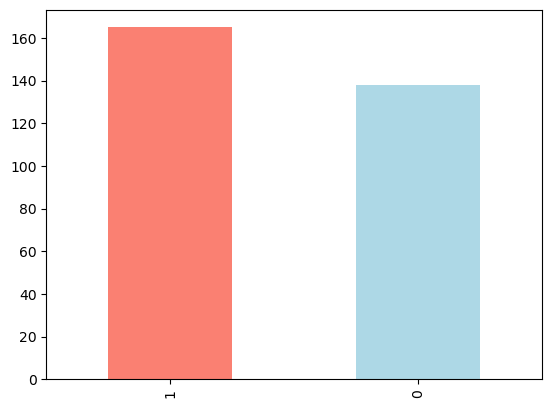

In [16]:
# since they are faily close, we want to visualize the target
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])

In [18]:
# check the type of each category
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [19]:
#check for NA's
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
#check general info of data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## heart disease frequency according to sex

In [4]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [5]:
#0 = female, 1=male
pd.crosstab(df.target, df.sex)    

sex,0,1
target,,
0,24,114
1,72,93


looking at the table, we can see that women are more likely to have heart rate since out of 96, 72 have heart disease
men in the other hand, roughly have a 50% change of having heart disease


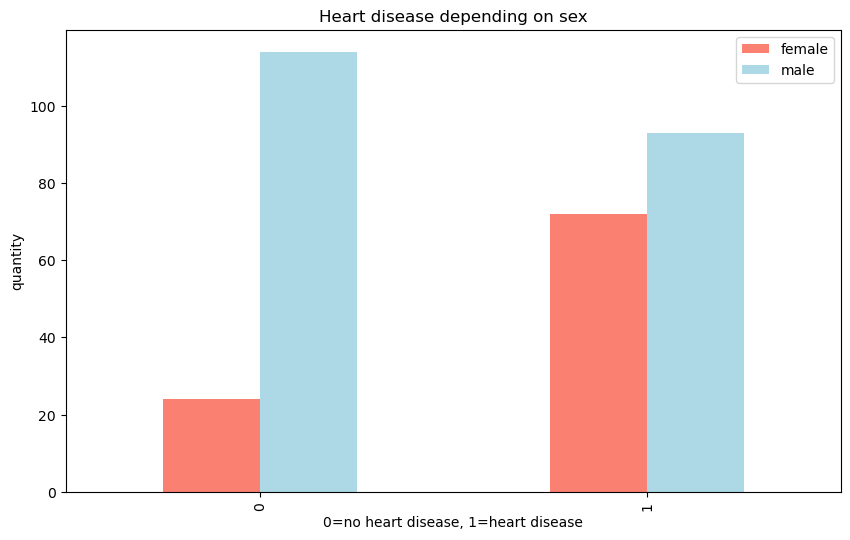

In [9]:
#create a plot for visualization

#plot creation as a plot, with a size of 10x6 and two colors
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(10,6), color=['salmon', 'lightblue']);

plt.title("Heart disease depending on sex")
plt.xlabel('0=no heart disease, 1=heart disease')
plt.ylabel('quantity')
plt.legend(["female", 'male']);



### Age vs Max Heart Rate for Heart Disease

In [11]:
df.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

Since we have 91 results, its better to use a scatter plot for better visualization


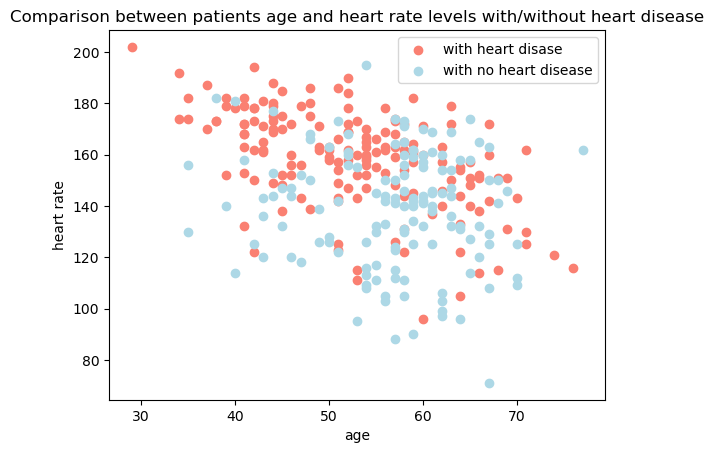

In [18]:
#creating scatter plot

#check the age and thalach of those with heart disease
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1],color='salmon');

#check the age and thalach of those with no heart disease
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], color='lightblue');

plt.title('Comparison between patients age and heart rate levels with/without heart disease')
plt.xlabel('age')
plt.ylabel('heart rate')
plt.legend(['with heart disase', 'with no heart disease']);

The only suggestion we can make based on the grapgh is the fact that the younger the patient, the higher the heart rate.
We cant really differentiate who will have heart disease with this information. Need machine learning to figure it out.

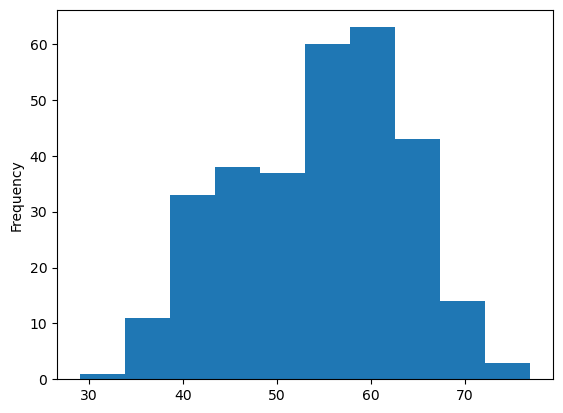

In [20]:
#lets check the distribution of the age column with a histogram
df.age.plot.hist();


### Check for heart disease frequency per chest pain type
cp - chest pain type

    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease



In [22]:
pd.crosstab(df.cp,
            df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


We can see that patients with non anginal chest pain tend to have the most heart disease rate from all categories
    

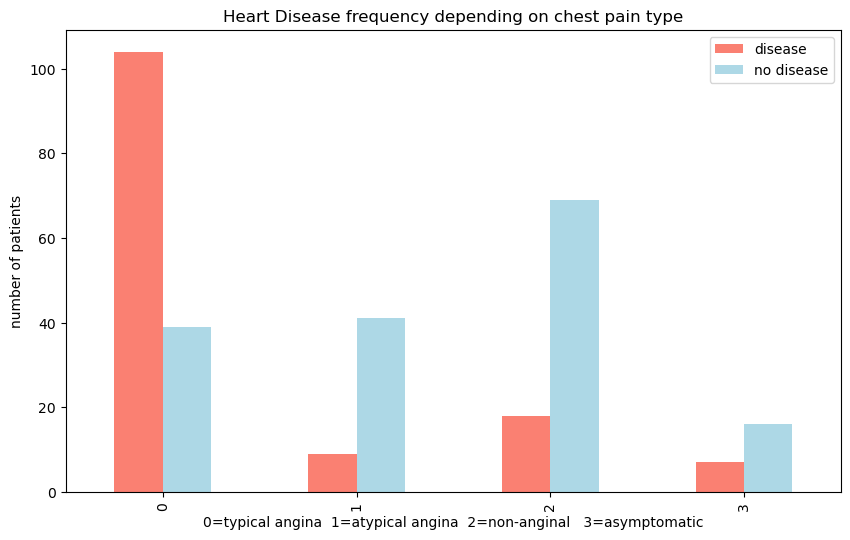

In [27]:
#creation of graph for visualization
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10,6), color=['salmon','lightblue'] )

plt.title("Heart Disease frequency depending on chest pain type")
plt.xlabel("0=typical angina  1=atypical angina  2=non-anginal   3=asymptomatic")
plt.ylabel('number of patients')
plt.legend(['disease', 'no disease']);

Non-anginal pain: typically esophageal spasms (non heart related) have highest percentage of heart_disease than other

### Make a correlation matrix

In [28]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


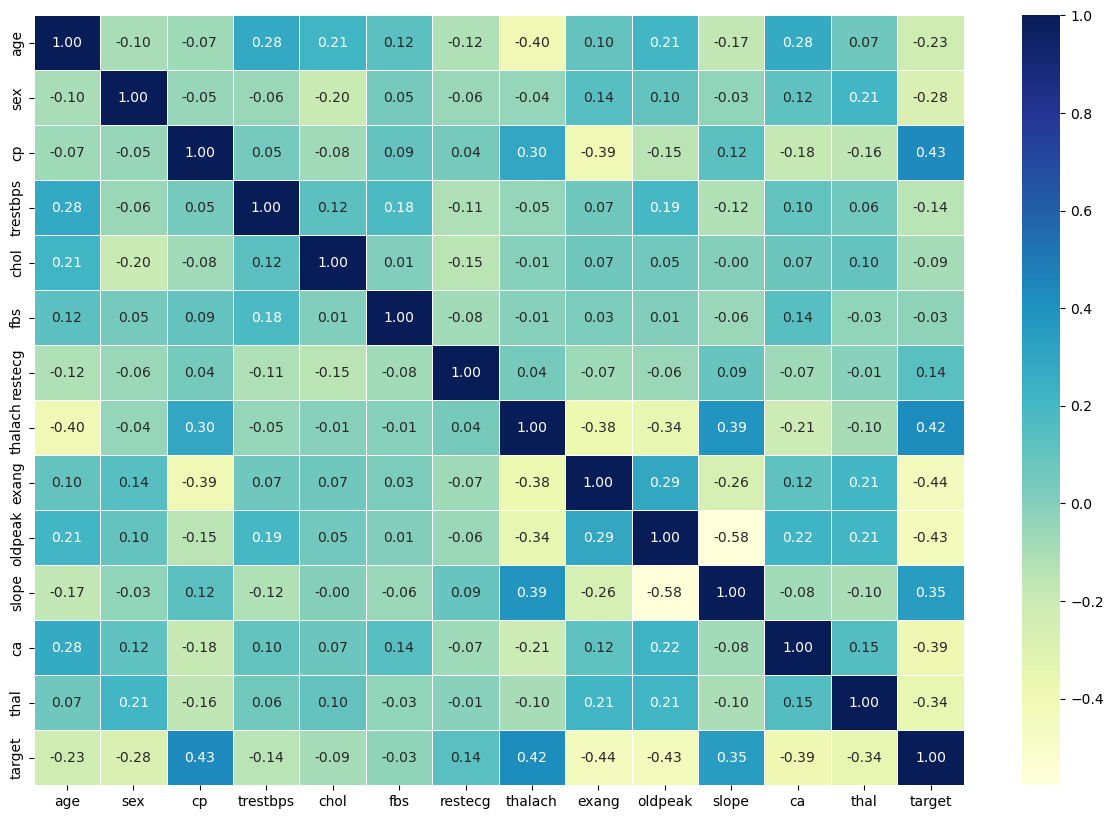

In [5]:
# making a graph for visualization

correlation_matrix=df.corr()
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, fmt='.2f', cmap='YlGnBu')


Using corralation matrix, we can see that exang(execising with chest pain) has a corralation of -0.44
comparing it with target =1.00, the lower exang, the less it haves heart disease. 
If the corralation is positive and closer 1, it haves higher changes of heart disease

## Modeling

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#split data into x and y

x=df.drop('target', axis=1)
y=df['target']

x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [8]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [7]:
#plit data into train and test for dev
np.random.seed(11)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3
91,57,1,0,132,207,0,1,168,1,0.0,2,0,3
80,41,1,2,112,250,0,1,179,0,0.0,2,0,2


In [11]:
y_train

95     1
44     1
257    0
270    0
243    0
      ..
161    1
269    0
91     1
80     1
191    0
Name: target, Length: 242, dtype: int64

Lets figure out what model to use for our machine

Reference to the scikit learn road map, will test the following:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier


In [17]:
#put models in a disctionary
models={'Logistic Regression': LogisticRegression(),
       "KNN": KNeighborsClassifier(),
       'Random Forest': RandomForestClassifier()}

#function that will iterate trhough the dic of machine learning models
def fit_and_score(models, x_train, x_test, y_test, y_train):
    #establish seed
    np.random.seed(11)
    
    #empty dic for result comparison
    results={}
    
    #loop over the key, values of the models dic
    for key, value in models.items():
        
        #fit the data
        value.fit(x_train, y_train)
        
        #score the model and store it into score dic
        results[key] = value.score(x_test, y_test)
    return results

#call the function
fit_and_score(models, x_train, x_test, y_test, y_train)

C:\Users\josue\Desktop\machine learning\heart_disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.819672131147541,
 'KNN': 0.6065573770491803,
 'Random Forest': 0.8032786885245902}

Based on the models, the Logistic Regression haves a higher percentage of accuracy than other models.

In [20]:
#call the function
models_scores=fit_and_score(models=models, x_train=x_train, x_test=x_test, y_test=y_test, y_train=y_train)
models_scores

C:\Users\josue\Desktop\machine learning\heart_disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.819672131147541,
 'KNN': 0.6065573770491803,
 'Random Forest': 0.8032786885245902}

## Model comparison

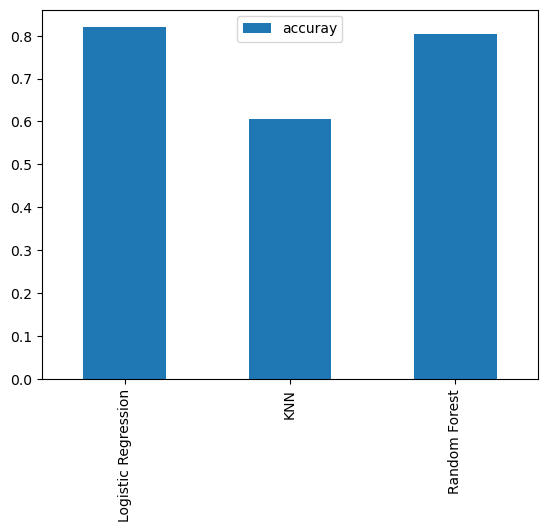

In [22]:
model_compare=pd.DataFrame(models_scores, index=['accuray'])
model_compare.T.plot.bar();

Even though the logistic regression is the highest, we still want to have a 95% of accuracy

Lets look at the following:
* hypyterparameter tuning
* feature importance
* confusion matrix
* cross validation
* precision
* recall
* f1 score
* classification report
* roc curve
* area under the curve

## Hyper parameter tuning


In [23]:
# Since KNN was the model with the lowest performance, we will try to improve it


In [24]:
train_scores=[]
test_scores=[]

#create a list of different values for n_neighbors
neighbors=range(1,21)

#set up knn instance
knn=KNeighborsClassifier()

#iteration
for x in neighbors:
    knn.set_params(n_neighbors=x)
    
    #fit the data
    knn.fit(x_train, y_train)
    
    #score data for train
    train_scores.append(knn.score(x_train, y_train))
    
    #score data for test
    test_scores.append(knn.score(x_test, y_test))
    


In [25]:
train_scores

[1.0,
 0.8181818181818182,
 0.7768595041322314,
 0.7603305785123967,
 0.7975206611570248,
 0.768595041322314,
 0.7355371900826446,
 0.7520661157024794,
 0.7355371900826446,
 0.71900826446281,
 0.7066115702479339,
 0.7107438016528925,
 0.7148760330578512,
 0.7066115702479339,
 0.6859504132231405,
 0.7148760330578512,
 0.6983471074380165,
 0.6942148760330579,
 0.7024793388429752,
 0.7066115702479339]

In [26]:
test_scores

[0.6229508196721312,
 0.5245901639344263,
 0.5737704918032787,
 0.5901639344262295,
 0.6065573770491803,
 0.5901639344262295,
 0.639344262295082,
 0.5737704918032787,
 0.639344262295082,
 0.5901639344262295,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.5901639344262295,
 0.639344262295082,
 0.639344262295082,
 0.6065573770491803,
 0.5901639344262295,
 0.639344262295082,
 0.5901639344262295]

63.934426229508205


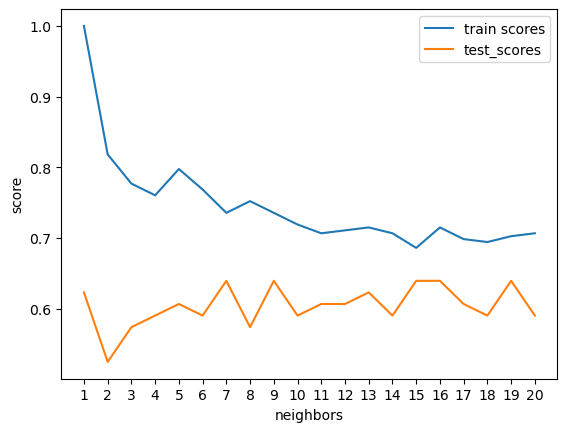

In [37]:
#plot the data for visualization
plt.plot(neighbors, train_scores, label='train scores')
plt.plot(neighbors, test_scores, label='test_scores')
plt.xticks(np.arange(1,21,1))
plt.xlabel('neighbors')
plt.ylabel("score")
plt.legend()

print(max(test_scores)*100)

it imprived from 60 to 63 % but still no progress

## Hyperparameter tuning with RandomizedSearchCV
Tune logisticRegression and randomForest

In [38]:
#create a hyperparameter frid for ligisticRegression

In [44]:
#create a hyperoarameter grid for ligisticregression
log_reg_grid={"C": np.logspace(-4, 4,20),
             "solver": ['liblinear']}

#create a hyperparamter frid for randomforest
rf_grid={'n_estimators': np.arange(10,1000, 50),
        'max_depth': [None, 3, 5, 10],
        'min_samples_split': np.arange(2,20,2),
        'min_samples_leaf': np.arange(1,20, 2)}


now we got hyperparameters grids setup for each of our models, lets tune them using randomizedseach


In [17]:
np.random.seed(11)

#initialized the random search model
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                           param_distributions=log_reg_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [18]:
#lets find the best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1487.3521072935118}

In [19]:
#score rs_log_res
rs_log_reg.score(x_test, y_test)*100

80.32786885245902

In [50]:
#not better than the initial test which was 81.98


lets try random forest now


In [63]:
np.random.seed(11)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                             param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [64]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_depth': 3}

In [65]:
rs_rf.score(x_test, y_test)

0.7868852459016393

none of the models above improved our acccuracy, re test

In [14]:
#Since the logistic regression is the most accurate for now, trying one more experiment

#different hyperparameters for our LogisticRegression model
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver": ['liblinear']}

#setup grid hyperparamter search for logisticregression
st_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid = log_reg_grid,
                        cv=5,
                        verbose=True
                       )

#fit the data
st_log_reg.fit(x_train, y_train);

#check the best parameters
st_log_reg.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'C': 4.893900918477489, 'solver': 'liblinear'}

In [11]:
#score the data
st_log_reg.score(x_test, y_test)

0.7868852459016393

In [13]:
#no improvement


In [13]:
np.random.seed(11)

lg_re=LogisticRegression()

lg_re.fit(x_train, y_train)


print(f"Best score so far is : {lg_re.score(x_test, y_test) *100 }")

Best score so far is : 81.9672131147541


C:\Users\josue\Desktop\machine learning\heart_disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluating our tuned machine learning classifier, beyond accuracy
* roc curve and auc score
* consusion matrix
* classification report
* precision
* racall
* f1 score

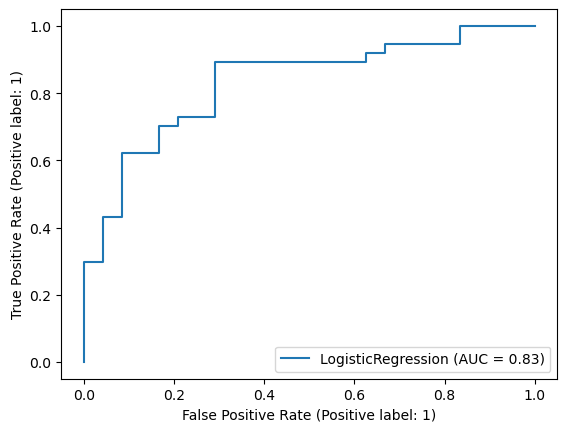

In [10]:
# set up roc curve 

#start up by making predictions with tuned model
y_preds= lg_re.predict(x_test)

#compare it with y_Test
y_test

#set the roc curve between the pred and test

svc_disp = RocCurveDisplay.from_estimator(lg_re, x_test, y_test)


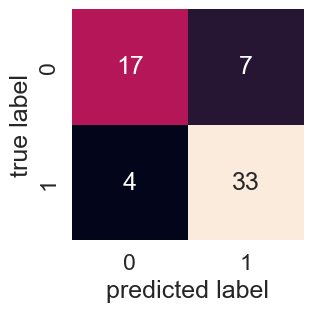

In [34]:
# now create a confusion matrix

#increase matrix size
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    
    #establish fig, ax
    fig, ax = plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot=True,
                   cbar=False
                  )
    plt.xlabel("predicted label")
    plt.ylabel("true label")
    
plot_conf_mat(y_test, y_preds)

 By observing the confusion matrix, we can see the in 4 occasions, the machine predicted that 4 didnt had any heart disease while
    in 7 occasions, it marked them with heart disease when no

In [36]:
#lets print some classifications now that we have seen some matrix info
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        24
           1       0.82      0.89      0.86        37

    accuracy                           0.82        61
   macro avg       0.82      0.80      0.81        61
weighted avg       0.82      0.82      0.82        61



* precision = proportion of positive identificaions that were correct
* recall = proportion of actual posives that were correct
* f1 = combination of precision and recall percentage
* support = number of samples it was tested

## Calculate evaluation metrics using cross validation
We are going t

In [21]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1487.3521072935118}

In [22]:
clf=LogisticRegression(C=1487.3521072935118, solver='liblinear')


In [25]:
#cross validated accuracy
cv_acc = cross_val_score(clf, x, y, cv=5, scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc


0.8283060109289618

In [26]:
#cross validated precision
cv_pre = cross_val_score(clf, x, y, cv=5, scoring='precision')
cv_pre = np.mean(cv_pre)
cv_pre

0.8230422730422731

In [27]:
#cross validated recall
cv_rec = cross_val_score(clf, x, y, cv=5, scoring='recall')
cv_rec = np.mean(cv_rec)
cv_rec

0.8787878787878787

In [29]:
#cross validated f1
cv_f1 = cross_val_score(clf, x, y, cv=5, scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8485836385836386

In [33]:
cv_metrics=pd.DataFrame({"Accuracy":cv_acc, "Precision":cv_pre, 'Recall': cv_rec, 'F1':cv_f1}, index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.828306,0.823042,0.878788,0.848584


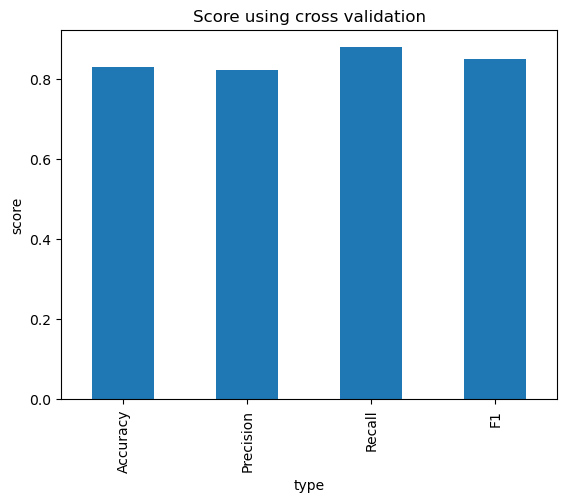

In [36]:
cv_metrics.T.plot.bar(title="Score using cross validation", xlabel="type", ylabel="score", legend=False);

## Feature importance
Which features are the most importance based on what the machine learned from our data once it executed different models

In [39]:
#fit an instance of logistic regression
clf=LogisticRegression(C=1487.3521072935118, solver='liblinear')

#fit the data
clf.fit(x_train, y_train)

#check the coeficient, it will tell us which have grater impact on target
clf.coef_

array([[-2.02328187e-03, -2.07655932e+00,  9.53891206e-01,
        -1.73404538e-02, -5.40020671e-03,  4.81523779e-01,
         3.43470886e-01,  3.50363745e-02, -5.21775954e-01,
        -4.64455492e-01,  6.85536032e-01, -1.12408714e+00,
        -1.67401472e+00]])

In [41]:
#create a dic, zip the first inx for clf.coef, in each index, assigned it to column
feature_dict=dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.002023281872964642,
 'sex': -2.0765593169353163,
 'cp': 0.9538912056182829,
 'trestbps': -0.017340453782829102,
 'chol': -0.005400206709864807,
 'fbs': 0.4815237789563775,
 'restecg': 0.3434708857858601,
 'thalach': 0.035036374539062956,
 'exang': -0.5217759543286077,
 'oldpeak': -0.4644554924086756,
 'slope': 0.6855360317616924,
 'ca': -1.124087144949798,
 'thal': -1.6740147205133737}

<Axes: title={'center': 'feature importance'}>

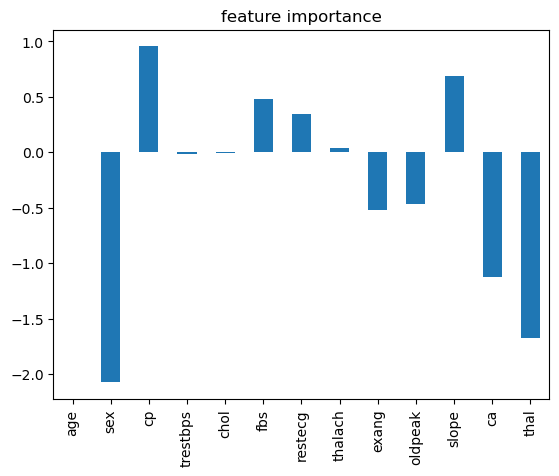

In [42]:
#create a bar plot for visualization
feature_def=pd.DataFrame(feature_dict, index=[0])
feature_def.T.plot.bar(title='feature importance', legend=False)

Based on the grapgh, we can see that the columns with a grater impace on target is cp, fbs, restcg, and slope. Other values in the negatives have a negative impact ratio on target`

## Experimentation

Things to improve
* Could you collect more data?
* Could you try a different model? like catboost or xgboost
* could you improve the current model?
* Are you satisfied with an 87 percent?